In [ ]:
import pandas as pd
from google.colab import files
import_data= files.upload()

Saving diabetic_data.csv to diabetic_data.csv


In [ ]:
data = pd.read_csv('diabetic_data.csv')

In [212]:
dataset = data.drop(data.columns[2:15],axis=1)

In [213]:
print(dataset.head())

   encounter_id  patient_nbr  number_outpatient  number_emergency  \
0       2278392      8222157                  0                 0   
1        149190     55629189                  0                 0   
2         64410     86047875                  2                 0   
3        500364     82442376                  0                 0   
4         16680     42519267                  0                 0   

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0                 0  250.83       ?      ?                 1           NaN   
1                 0     276  250.01    255                 9           NaN   
2                 1     648     250    V27                 6           NaN   
3                 0       8  250.43    403                 7           NaN   
4                 0     197     157    250                 5           NaN   

   ... citoglipton insulin glyburide-metformin glipizide-metformin  \
0  ...          No      No                  No

In [215]:
mapping = {'NO': 0, '<30': 1, '>30': 1}
dataset['readmitted_binary'] = dataset['readmitted'].map(mapping)
print(dataset)

        encounter_id  patient_nbr  number_outpatient  number_emergency  \
0            2278392      8222157                  0                 0   
1             149190     55629189                  0                 0   
2              64410     86047875                  2                 0   
3             500364     82442376                  0                 0   
4              16680     42519267                  0                 0   
...              ...          ...                ...               ...   
101761     443847548    100162476                  0                 0   
101762     443847782     74694222                  0                 0   
101763     443854148     41088789                  1                 0   
101764     443857166     31693671                  0                 0   
101765     443867222    175429310                  0                 0   

        number_inpatient  diag_1  diag_2 diag_3  number_diagnoses  \
0                      0  250.83       ?  

In [216]:
print(dataset['readmitted_binary'].mean())
counts = dataset['readmitted_binary'].value_counts()
print(counts)

0.4608808442898414
readmitted_binary
0    54864
1    46902
Name: count, dtype: int64


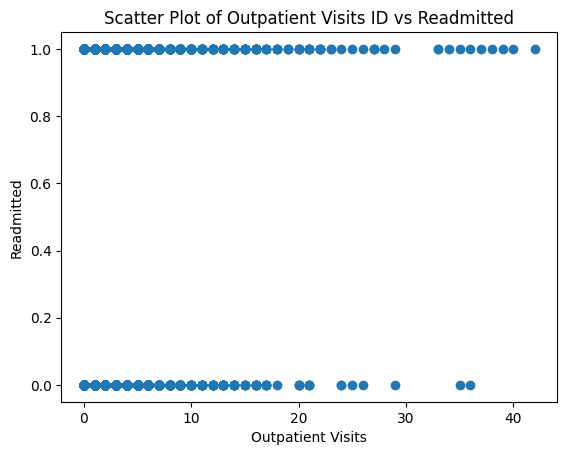

In [217]:
from matplotlib import pyplot as plt
plt.scatter(dataset['number_outpatient'], dataset['readmitted_binary'])
plt.title('Scatter Plot of Outpatient Visits ID vs Readmitted')
plt.xlabel('Outpatient Visits')
plt.ylabel('Readmitted')
plt.show()

In [218]:
x = dataset['number_outpatient'].values.reshape(-1,1)
y = dataset['readmitted_binary'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

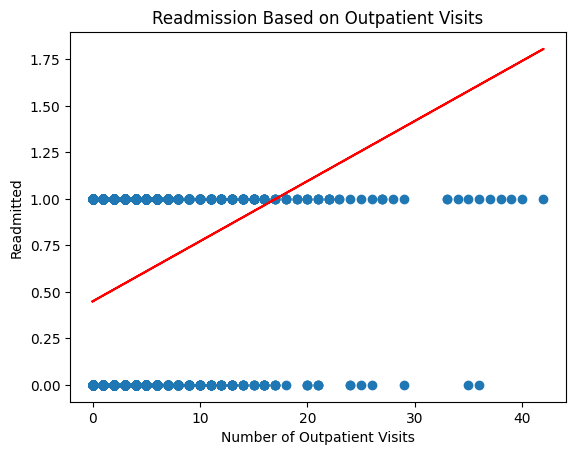

In [219]:
from matplotlib import pyplot as plt
plt.scatter(dataset['number_outpatient'], dataset['readmitted_binary'])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in list(dataset['number_outpatient'])]
plt.plot(dataset['number_outpatient'], prediction, color='red')
plt.title('Readmission Based on Outpatient Visits')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Readmitted')
plt.show()

In [220]:
dataset['predicted']=regressor.predict(x)
print(dataset['predicted'])

0         0.448947
1         0.448947
2         0.513567
3         0.448947
4         0.448947
            ...   
101761    0.448947
101762    0.448947
101763    0.481257
101764    0.448947
101765    0.448947
Name: predicted, Length: 101766, dtype: float64


In [221]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x= dataset['number_outpatient'].values.reshape(-1,1)
y= dataset['readmitted_binary']
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [222]:
dataset['logisticprediction']=model.predict_proba(x)[:,1]

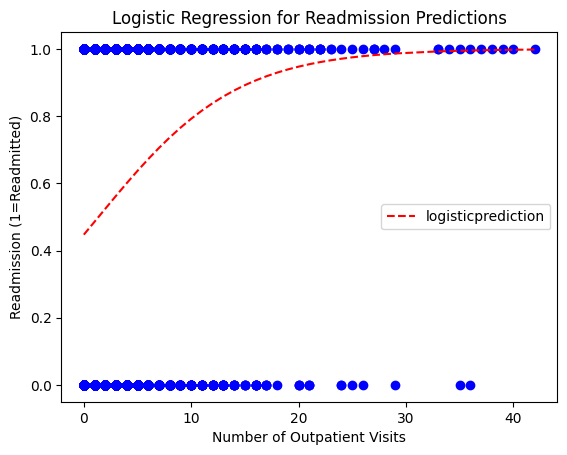

In [223]:
fig = plt.scatter(dataset['number_outpatient'],dataset['readmitted_binary'], color='blue')
dataset.sort_values('number_outpatient').plot('number_outpatient',
'logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Readmission Predictions')
plt.xlabel('Number of Outpatient Visits')
plt.ylabel('Readmission (1=Readmitted)')
plt.show()


In [236]:
x = dataset['number_outpatient'].values.reshape(-1,1)
dataset['logisticprediction']=model.predict_proba(x)[:,1]
# print(list(dataset.sort_values(by='logisticprediction',ascending=False).loc[:,'patient_nbr']))

In [225]:
print(len(list(dataset.loc[dataset['logisticprediction']>.75,'patient_nbr'])))

368


# FUTURE DATASET

In [226]:
import random
future_patients = pd.DataFrame({'outpatient_visits': dataset['number_outpatient'].sample(100000,replace=True).values})
future_patients['patient_nbr']=[i for i in range(0,100000)]

In [227]:
x = future_patients['outpatient_visits'].values.reshape(-1,1)
future_patients['logisticprediction']=model.predict_proba(x)[:,1]
future_patients['readmitted_binary']=(future_patients['logisticprediction'] >= 0.46).astype(int)
print(future_patients.head())
print(future_patients['logisticprediction'])

   outpatient_visits  patient_nbr  logisticprediction  readmitted_binary
0                  0            0             0.44717                  0
1                  0            1             0.44717                  0
2                  0            2             0.44717                  0
3                  0            3             0.44717                  0
4                  0            4             0.44717                  0
0        0.44717
1        0.44717
2        0.44717
3        0.44717
4        0.44717
          ...   
99995    0.44717
99996    0.44717
99997    0.44717
99998    0.44717
99999    0.44717
Name: logisticprediction, Length: 100000, dtype: float64


In [235]:
#print(future_patients.sort_values(by='logisticprediction',ascending=False).loc[:,'patient_nbr'])

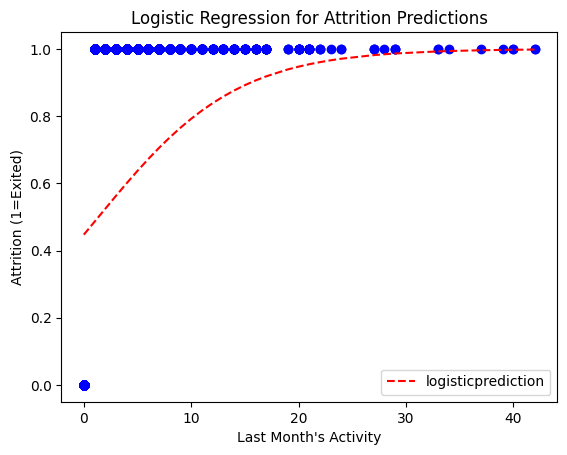

In [229]:
fig = plt.scatter(future_patients['outpatient_visits'],future_patients['readmitted_binary'], color='blue')
future_patients.sort_values('outpatient_visits').plot('outpatient_visits','logisticprediction',ls='--', ax=fig.axes,color='red')
plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

In [230]:
print(future_patients['readmitted_binary'].mean())
counts = future_patients['readmitted_binary'].value_counts()
print(counts)

0.16512
readmitted_binary
0    83488
1    16512
Name: count, dtype: int64


In [231]:
print(len(list(future_patients.loc[future_patients['logisticprediction']>.75,'patient_nbr'])))
print(len(list(dataset.loc[dataset['logisticprediction']>.75,'patient_nbr'])))

347
368


In [232]:
median=dataset['logisticprediction'].median()
prediction=list(1*(dataset['logisticprediction']>median))
actual=list(dataset['readmitted_binary'])

In [233]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(actual,prediction))

[[47912  6952]
 [37115  9787]]


In [234]:
confusion_mat= confusion_matrix(prediction,actual)
precision = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1])
recall = confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0])
print(precision)
print(recall)

0.563491596786903
0.8732866724992709
